In [363]:
#Data Glacier Project 1

import pandas as pd
import numpy as np
import datetime
import pickle
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from scipy import stats

In [244]:
#Importing all datasets

cab_df = pd.read_csv("C://Users/farhe/Downloads/DataSets-main/DataSets-main/Cab_Data.csv")
transaction_df = pd.read_csv("C://Users/farhe/Downloads/DataSets-main/DataSets-main/Transaction_ID.csv")
city_df = pd.read_csv("C://Users/farhe/Downloads/DataSets-main/DataSets-main/City.csv")
cust_df = pd.read_csv("C://Users/farhe/Downloads/DataSets-main/DataSets-main/Customer_ID.csv")

In [245]:
cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [246]:
cab_df.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [247]:
transaction_df.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [248]:
transaction_df.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [249]:
city_df.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [250]:
city_df.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

In [251]:
cust_df.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [252]:
cust_df.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [253]:
#Merge all the datasets
df = cab_df.merge(transaction_df, on= 'Transaction ID').merge(cust_df, on ='Customer ID').merge(city_df, on = 'City')

In [254]:
df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,43162,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29,6829,"418,859","127,001"
359388,10319775,43203,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29,6829,"418,859","127,001"
359389,10347676,43287,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29,6829,"418,859","127,001"
359390,10358624,43314,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,Female,29,6829,"418,859","127,001"


In [255]:
df.dtypes

Transaction ID          int64
Date of Travel          int64
Company                object
City                   object
KM Travelled          float64
Price Charged         float64
Cost of Trip          float64
Customer ID             int64
Payment_Mode           object
Gender                 object
Age                     int64
Income (USD/Month)      int64
Population             object
Users                  object
dtype: object

In [256]:
df.isnull().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64

In [257]:
#changing the datatypes of Population and Users

df['Population'] = [x.replace(',', '') for x in df['Population']]
df['Population'] = df['Population'].astype(float)

#changing the datatype of Users
df['Users'] = [x.replace(',', '') for x in df['Users']]
df['Users'] = df['Users'].astype(int)


In [258]:
Start =pd.Timestamp('1899-12-30')
df["Date of Travel"] = pd.to_datetime(df["Date of Travel"], unit="D", origin = Start)

In [259]:
df.dtypes

Transaction ID                 int64
Date of Travel        datetime64[ns]
Company                       object
City                          object
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Customer ID                    int64
Payment_Mode                  object
Gender                        object
Age                            int64
Income (USD/Month)             int64
Population                   float64
Users                          int32
dtype: object

In [260]:
for column in ["Company", "City" , "Payment_Mode" , "Gender" ] :
    
        df[column] = df[column].astype('category')
        

In [261]:
df.dtypes

Transaction ID                 int64
Date of Travel        datetime64[ns]
Company                     category
City                        category
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Customer ID                    int64
Payment_Mode                category
Gender                      category
Age                            int64
Income (USD/Month)             int64
Population                   float64
Users                          int32
dtype: object

In [262]:
'''#one hot encoding

encoded = pd.get_dummies(df, columns = ['Company', 'Payment_Mode', 'Gender'])
encoded
'''

"#one hot encoding\n\nencoded = pd.get_dummies(df, columns = ['Company', 'Payment_Mode', 'Gender'])\nencoded\n"

In [263]:
#Split the dataset into Pink and Yellow cab company

PinkCab = df[df['Company']=='Pink Cab']
YellowCab = df[df['Company']=='Yellow Cab']

In [264]:
PinkCab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,814885.0,24701
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,814885.0,24701
6,10395626,2018-10-27,Pink Cab,ATLANTA GA,13.39,167.03,141.934,27703,Card,Male,27,9237,814885.0,24701
7,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,814885.0,24701
11,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,814885.0,24701


In [265]:
YellowCab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885.0,24701
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885.0,24701
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885.0,24701
5,10324737,2018-05-04,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,27703,Cash,Male,27,9237,814885.0,24701
8,10079404,2016-09-21,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,28712,Card,Male,53,11242,814885.0,24701


In [266]:
df['Year'] = df['Date of Travel'].dt.year
df['Month'] = df['Date of Travel'].dt.month

In [267]:
df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Year,Month
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885.0,24701,2016,1
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885.0,24701,2018,7
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885.0,24701,2018,11
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885.0,24701,2016,1
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885.0,24701,2018,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,2018-03-03,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29,6829,418859.0,127001,2018,3
359388,10319775,2018-04-13,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29,6829,418859.0,127001,2018,4
359389,10347676,2018-07-06,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29,6829,418859.0,127001,2018,7
359390,10358624,2018-08-02,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,Female,29,6829,418859.0,127001,2018,8


In [268]:
#Calculate Margin 

df["Margin"]= df['Price Charged'] - df['Cost of Trip']

In [269]:
df.drop(['Date of Travel'], axis=1, inplace=True)

In [270]:
df

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Year,Month,Margin
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885.0,24701,2016,1,57.3150
1,10351127,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885.0,24701,2018,7,281.2772
2,10412921,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885.0,24701,2018,11,194.6480
3,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885.0,24701,2016,1,23.6660
4,10320494,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885.0,24701,2018,4,253.9808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29,6829,418859.0,127001,2018,3,143.6180
359388,10319775,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29,6829,418859.0,127001,2018,4,23.0464
359389,10347676,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29,6829,418859.0,127001,2018,7,-5.8540
359390,10358624,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,Female,29,6829,418859.0,127001,2018,8,-6.0900


In [271]:
import seaborn as sns
import matplotlib.pyplot as plt

cor_rel = df.corr()
cor_rel

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Population,Users,Year,Month,Margin
Transaction ID,1.000000,-0.001429,-0.052902,-0.003462,-0.016912,-0.001267,-0.001570,0.023868,0.013526,0.941600,0.287009,-0.087130
KM Travelled,-0.001429,1.000000,0.835753,0.981848,0.000389,-0.000369,-0.000544,-0.002311,-0.000428,-0.001072,-0.001903,0.462768
Price Charged,-0.052902,0.835753,1.000000,0.859812,-0.177324,-0.003084,0.003228,0.326589,0.281061,-0.036409,-0.061116,0.864154
Cost of Trip,-0.003462,0.981848,0.859812,1.000000,0.003077,-0.000189,-0.000633,0.015108,0.023628,-0.001773,-0.008370,0.486056
Customer ID,-0.016912,0.000389,-0.177324,0.003077,1.000000,-0.004735,-0.013608,-0.647052,-0.610742,-0.002539,-0.044656,-0.306527
Age,-0.001267,-0.000369,-0.003084,-0.000189,-0.004735,1.000000,0.003907,-0.009002,-0.005906,-0.000579,-0.002226,-0.005093
Income (USD/Month),-0.001570,-0.000544,0.003228,-0.000633,-0.013608,0.003907,1.000000,0.011868,0.010464,-0.001617,0.000322,0.006148
Population,0.023868,-0.002311,0.326589,0.015108,-0.647052,-0.009002,0.011868,1.000000,0.915490,0.000003,0.064571,0.544079
Users,0.013526,-0.000428,0.281061,0.023628,-0.610742,-0.005906,0.010464,0.915490,1.000000,-0.000771,0.036558,0.457758
Year,0.941600,-0.001072,-0.036409,-0.001773,-0.002539,-0.000579,-0.001617,0.000003,-0.000771,1.000000,-0.030490,-0.060567


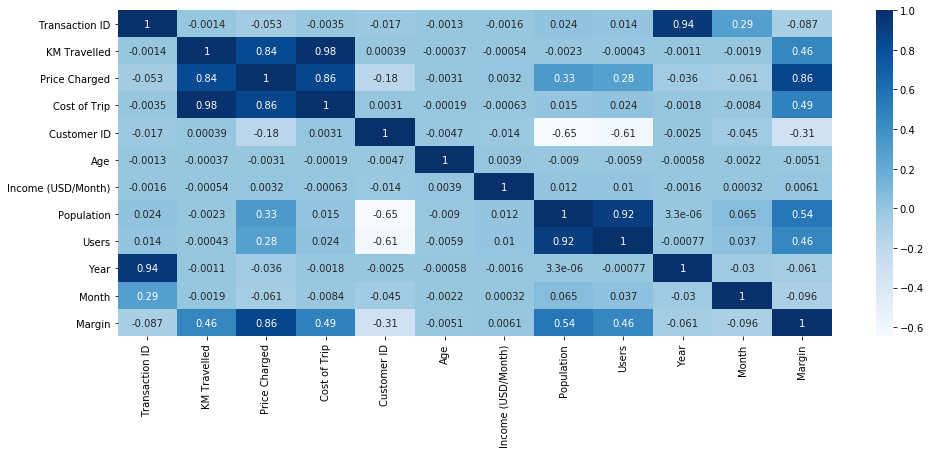

In [297]:
plt.figure(figsize = (16, 6))
sns.heatmap(cor_rel, annot = True, cmap = plt.cm.Blues)
plt.show()

There is a correlation between Customer ID, Price charged, Users, KM Travelled. 

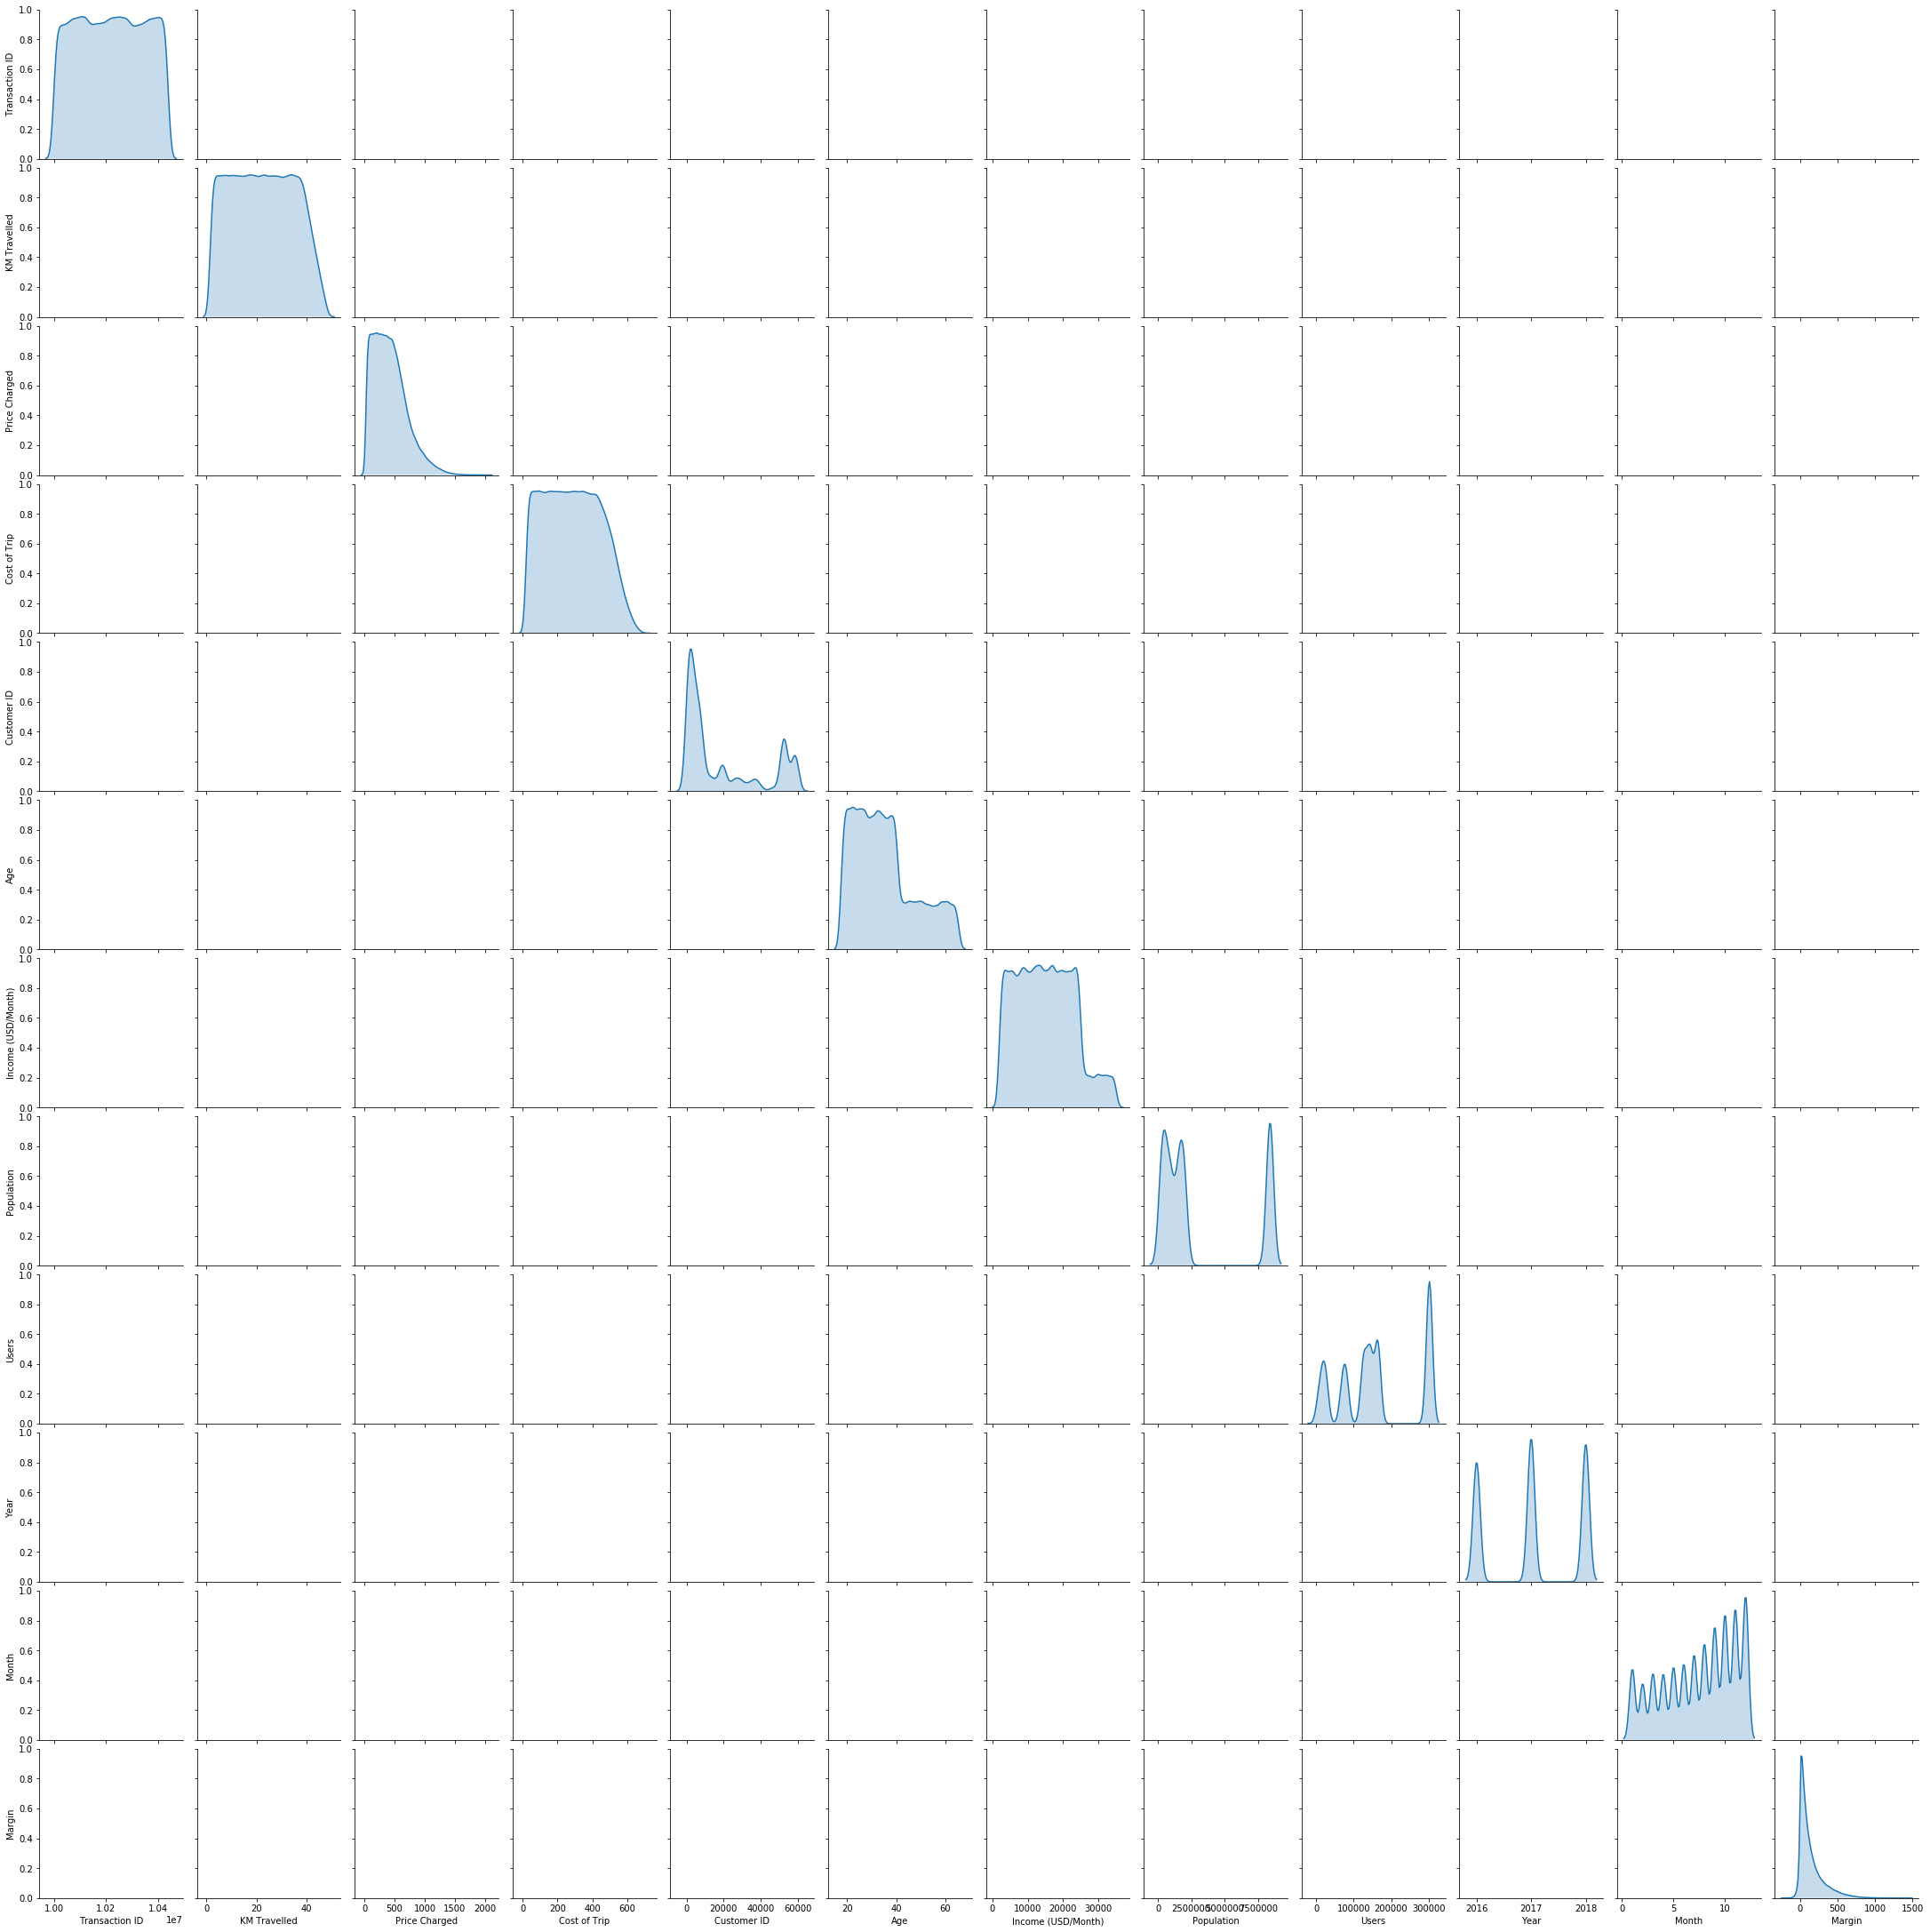

In [273]:
#Exploring the relationship between all the features

sns.pairplot(data = df, kind = 'kde', diag_kind  = 'kde')

# USERS 

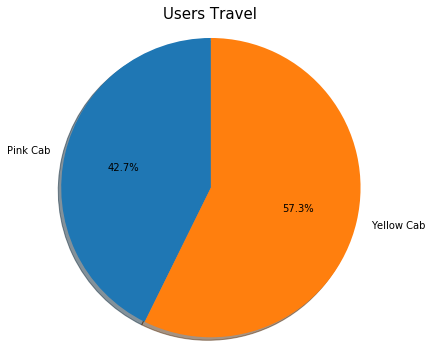

In [274]:
user = df.groupby('Company')
avg_user = user.Users.mean()
index = avg_user.index
value = avg_user.values

figp, axp = plt.subplots(figsize=(6, 6))
axp.pie(value , labels=index, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Users Travel', fontsize = 15)
plt.show()

In [275]:
#Yellow cab company has more users than pink cab. 

# Users in each city

In [276]:
city_users = df.groupby('City').Users.count()

In [279]:
#Margin by company
Total_Margin_received = df.groupby('Company').Margin.count()

In [280]:
Total_Margin_received

Company
Pink Cab       84711
Yellow Cab    274681
Name: Margin, dtype: int64

In [287]:
#Need to change this to calculate the margin for both the companies.
#Margin_comparison
X= Total_Margin_received
titles = ['Total Margin received']       
fig = plt.figure(figsize=(15,15))
sub_pieplot(X,titles,1,2,fig)


NameError: name 'sub_pieplot' is not defined

<Figure size 1080x1080 with 0 Axes>

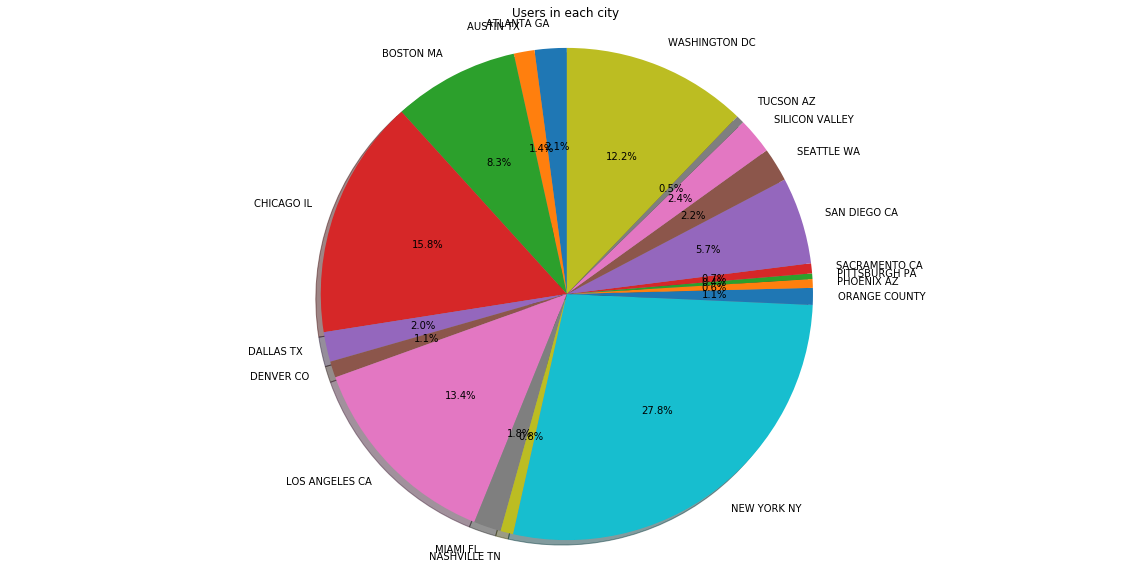

In [238]:
label = city_users.index
value = city_users.values
figp, axp = plt.subplots(figsize = (20, 10))
axp.pie(value, labels = label, autopct = '%1.1f%%', shadow=True, startangle=90, )
axp.axis('equal')
plt.title('Users in each city')
plt.show()

As per the above graph, NewYork city has more users followed by Chicago and Los Angeles.  

# Price charged for each company

In [239]:
price_charged = df.groupby(['Company', 'Price Charged']).Company.count()

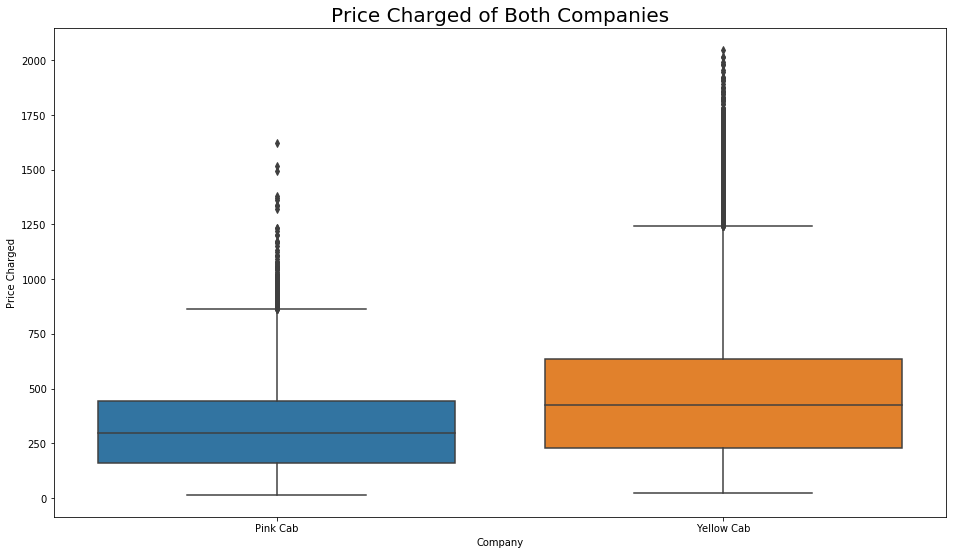

In [240]:
plt.figure(figsize = (16, 9))

sns.boxplot(df['Company'], df['Price Charged'])
plt.title('Price Charged of Both Companies', fontsize=20)
plt.show()

In [36]:
#Yellow cab charges are high compared to pink cab. 

# KM Travelled

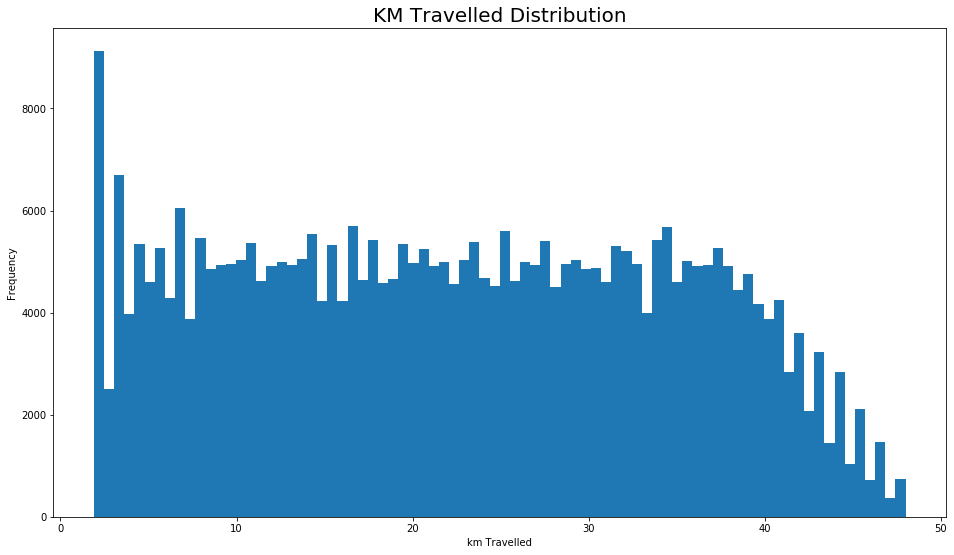

In [241]:
plt.figure(figsize = (16, 9))
plt.hist(df['KM Travelled'], bins = 80)
plt.title('KM Travelled Distribution', fontsize = 20)
plt.ylabel('Frequency')
plt.xlabel('km Travelled')
plt.show()


In [38]:
#The distance varies from 2KM to 48KM

# Payment Mode 

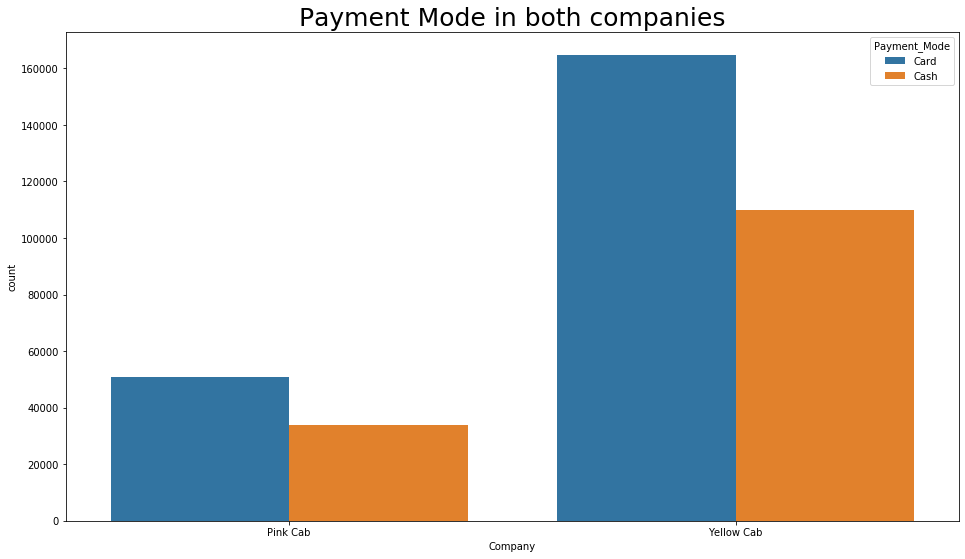

In [298]:
plt.figure(figsize = (16, 9))
ax = sns.countplot(x="Company", hue="Payment_Mode", data=df)
plt.title('Payment Mode in both companies', fontsize=25)
plt.show()

#Both the companies preferred to pay by Card. 

# Hypothesis Testing

H0 : Margin remains the same for both the Genders and the cabs. 
H1 : There is change in the margin

In [ ]:
#Pink Cab

df['Profit'] = df['Price Charged'] - df['Cost of Trip']
a = df[(df.Gender=='Male')&(df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
b = df[(df.Gender=='Female')&(df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding gender for Pink Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding gender for Pink Cab')

In [ ]:
#Yellow Cab

df['Profit'] = df['Price Charged'] - df['Cost of Trip']
a = df[(df.Gender=='Male')&(df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
b = df[(df.Gender=='Female')&(df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding gender for Yellow Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding gender for Yellow Cab')

# Margins by Age 

In [ ]:
a = df[(df.Age <= 60)&(df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
b = df[(df.Age >= 60)&(df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding age for Pink Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding age for Pink Cab')

In [ ]:
a = df[(df.Age <= 60)&(df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
b = df[(df.Age >= 60)&(df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding age for Yellow Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding age for Yellow Cab')

###### Margins by payment mode

In [ ]:
a = df[(df['Payment_Mode']=='Cash')&(df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
b = df[(df['Payment_Mode']=='Card')&(df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference in payment mode for Pink Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference in payment mode for Pink Cab')

In [587]:
a = df[(df['Payment_Mode']=='Cash')&(df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
b = df[(df['Payment_Mode']=='Card')&(df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference in payment mode for Yellow Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference in payment mode for Yellow Cab')

P value is  0.29330606382985325
We accept null hypothesis (H0) that there is no difference in payment mode for Yellow Cab


In [299]:
df

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Year,Month,Margin
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885.0,24701,2016,1,57.3150
1,10351127,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885.0,24701,2018,7,281.2772
2,10412921,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885.0,24701,2018,11,194.6480
3,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885.0,24701,2016,1,23.6660
4,10320494,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885.0,24701,2018,4,253.9808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29,6829,418859.0,127001,2018,3,143.6180
359388,10319775,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29,6829,418859.0,127001,2018,4,23.0464
359389,10347676,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29,6829,418859.0,127001,2018,7,-5.8540
359390,10358624,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,Female,29,6829,418859.0,127001,2018,8,-6.0900


In [301]:
encoded = pd.get_dummies(df, columns = ['Company', 'City', 'Gender', 'City'])
encoded

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Age,Income (USD/Month),Population,Users,...,City_NEW YORK NY,City_ORANGE COUNTY,City_PHOENIX AZ,City_PITTSBURGH PA,City_SACRAMENTO CA,City_SAN DIEGO CA,City_SEATTLE WA,City_SILICON VALLEY,City_TUCSON AZ,City_WASHINGTON DC
0,10000011,30.45,370.95,313.6350,29290,Card,28,10813,814885.0,24701,...,0,0,0,0,0,0,0,0,0,0
1,10351127,26.19,598.70,317.4228,29290,Cash,28,10813,814885.0,24701,...,0,0,0,0,0,0,0,0,0,0
2,10412921,42.55,792.05,597.4020,29290,Card,28,10813,814885.0,24701,...,0,0,0,0,0,0,0,0,0,0
3,10000012,28.62,358.52,334.8540,27703,Card,27,9237,814885.0,24701,...,0,0,0,0,0,0,0,0,0,0
4,10320494,36.38,721.10,467.1192,27703,Card,27,9237,814885.0,24701,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,38.40,668.93,525.3120,51406,Cash,29,6829,418859.0,127001,...,0,0,0,0,0,0,0,0,0,1
359388,10319775,3.57,67.60,44.5536,51406,Cash,29,6829,418859.0,127001,...,0,0,0,0,0,0,0,0,0,1
359389,10347676,23.46,331.97,337.8240,51406,Card,29,6829,418859.0,127001,...,0,0,0,0,0,0,0,0,0,1
359390,10358624,27.60,358.23,364.3200,51406,Cash,29,6829,418859.0,127001,...,0,0,0,0,0,0,0,0,0,1


In [302]:
encoded.dtypes

Transaction ID            int64
KM Travelled            float64
Price Charged           float64
Cost of Trip            float64
Customer ID               int64
Payment_Mode           category
Age                       int64
Income (USD/Month)        int64
Population              float64
Users                     int32
Year                      int64
Month                     int64
Margin                  float64
Company_Pink Cab          uint8
Company_Yellow Cab        uint8
City_ATLANTA GA           uint8
City_AUSTIN TX            uint8
City_BOSTON MA            uint8
City_CHICAGO IL           uint8
City_DALLAS TX            uint8
City_DENVER CO            uint8
City_LOS ANGELES CA       uint8
City_MIAMI FL             uint8
City_NASHVILLE TN         uint8
City_NEW YORK NY          uint8
City_ORANGE COUNTY        uint8
City_PHOENIX AZ           uint8
City_PITTSBURGH PA        uint8
City_SACRAMENTO CA        uint8
City_SAN DIEGO CA         uint8
City_SEATTLE WA           uint8
City_SIL

#Creating the model

In [303]:
encoded.shape

(359392, 55)

In [307]:
from sklearn.model_selection import train_test_split

Input = encoded[['Age','KM Travelled', 'Company_Pink Cab', 'Company_Yellow Cab', 'City_WASHINGTON DC', 'City_TUCSON AZ', 'City_SILICON VALLEY', 'City_SEATTLE WA', 'City_SAN DIEGO CA', 'City_SACRAMENTO CA', 'City_PITTSBURGH PA', 'City_PHOENIX AZ', 'City_ORANGE COUNTY', 'City_NEW YORK NY', 'City_NASHVILLE TN', 'City_MIAMI FL', 'City_LOS ANGELES CA', 'City_DENVER CO', 'City_ATLANTA GA',
'City_AUSTIN TX',
'City_BOSTON MA', 'City_CHICAGO IL', 'City_DALLAS TX' ,'Month','Gender_Female', 'Gender_Male']].copy()

In [308]:
Input

,Age,KM Travelled,Company_Pink Cab,Company_Yellow Cab,City_WASHINGTON DC,City_WASHINGTON DC,City_TUCSON AZ,City_TUCSON AZ,City_SILICON VALLEY,City_SILICON VALLEY,...,City_AUSTIN TX,City_BOSTON MA,City_BOSTON MA,City_CHICAGO IL,City_CHICAGO IL,City_DALLAS TX,City_DALLAS TX,Month,Gender_Female,Gender_Male
0,28,30.45,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,28,26.19,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7,0,1
2,28,42.55,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,11,0,1
3,27,28.62,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,27,36.38,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,29,38.40,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,3,1,0
359388,29,3.57,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,4,1,0
359389,29,23.46,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,7,1,0
359390,29,27.60,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,8,1,0


In [309]:
Target = df[['Price Charged']].copy()
Target

,Price Charged
0,370.95
1,598.70
2,792.05
3,358.52
4,721.10
...,...
359387,668.93
359388,67.60
359389,331.97
359390,358.23


In [310]:
X_train, X_test, Y_train, Y_test = train_test_split(Input, Target, test_size=0.2, shuffle = True)

In [349]:
from sklearn.linear_model import LinearRegression

predictions = []

model = LinearRegression()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
predictions.append(y_pred)
print('Accuracy of Linear regression on test set: {:.2f}' .format(model.score(X_test, Y_test)))

Accuracy of Linear regression on test set: 0.86


In [355]:
predictions

[array([[793.59847678],
        [390.00916749],
        [484.26039188],
        ...,
        [502.14781511],
        [584.50616372],
        [297.47586688]]),
 array([1008.3756,  371.57  ,  581.594 , ...,  481.108 ,  610.351 ,
         278.9   ]),
 array([957.195, 371.57 , 631.08 , ..., 454.37 , 762.58 , 298.55 ])]

In [351]:
from sklearn.ensemble import RandomForestRegressor

Random_Model =RandomForestRegressor(n_estimators = 10, random_state = 0)
Random_Model.fit(X_train,Y_train)
y_pred_random = Random_Model.predict(X_test)
print('Accuracy of Random Forest Regressor on test set: {:.2f}' .format(Random_Model.score(X_test, Y_test)))

predictions.append(y_pred_random)

C:\Users\farhe\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy of Random Forest Regressor on test set: 0.91


In [354]:
from sklearn.tree import DecisionTreeRegressor 
Decision_Model = DecisionTreeRegressor(random_state = 0) 
Decision_Model.fit(X_train, Y_train)
y_pred_decision = Decision_Model.predict(X_test)
print('Accuracy of Decision Tree Regressor on test set: {:.2f}' .format(Decision_Model.score(X_test, Y_test)))

predictions.append(y_pred_decision)

Accuracy of Decision Tree Regressor on test set: 0.86


In [348]:
predictions

[array([[793.59847678],
        [390.00916749],
        [484.26039188],
        ...,
        [502.14781511],
        [584.50616372],
        [297.47586688]]),
 'y_pred_random',
 'y_pred_decision',
 'y_pred_random',
 'y_pred_decision',
 'y_pred_random',
 array([1008.3756,  371.57  ,  581.594 , ...,  481.108 ,  610.351 ,
         278.9   ]),
 array([957.195, 371.57 , 631.08 , ..., 454.37 , 762.58 , 298.55 ])]

Text(0, 0.5, 'Price Charged')

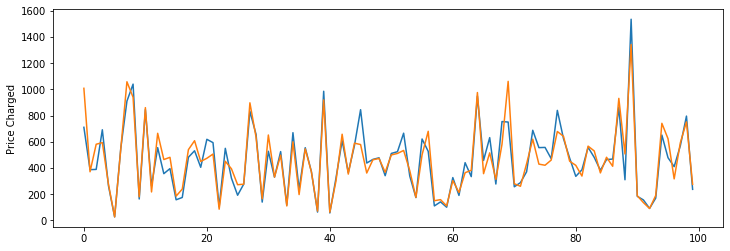

In [361]:
Y_test['predictions']
price_test = Y_test[:100]
fig, ax = plt.subplots()
fig.set_size_inches(12, 4)
plt.plot(price_test[['Price Charged', 'predictions']].values)
plt.ylabel('Price Charged', fontsize =10)

In [364]:
pickle.dump(Random_Model, open('Regression_model.pkl', 'wb'))
pickle.load(open('Regression_model.pkl', 'rb'))

RandomForestRegressor(n_estimators=10, random_state=0)